In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [5]:
# Dataset 1
player = pd.read_csv("./players.csv")
club = pd.read_csv("./clubs.csv")
value = pd.read_csv("./player_valuations.csv")

player.head()

,player_id,name,current_club_id,current_club_name,country_of_citizenship,country_of_birth,city_of_birth,date_of_birth,position,sub_position,...,highest_market_value_in_eur,agent_name,contract_expiration_date,current_club_domestic_competition_id,first_name,last_name,player_code,image_url,last_season,url
0,134354,Ian Raeymaekers,498,Ksc Lokeren,Belgium,Belgium,Aalst,1995-01-30,Attack,Centre-Forward,...,50000.0,NaN,NaN,BE1,Ian,Raeymaekers,ian-raeymaekers,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/ian-raeymaeker...
1,99946,Mohamed Camara,1095,Es Troyes Ac,Guinea,Guinea,Conakry,1990-09-20,Attack,Centre-Forward,...,300000.0,NaN,NaN,FR1,Mohamed,Camara,mohamed-camara,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/mohamed-camara...
2,76948,Pablo Olivera,979,Moreirense Fc,Uruguay,Uruguay,Melo,1987-12-08,Attack,Centre-Forward,...,600000.0,NaN,NaN,PO1,Pablo,Olivera,pablo-olivera,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/pablo-olivera/...
3,108372,Aliosman Aydin,38,Fortuna Dusseldorf,Turkey,Germany,Dormagen,1992-02-06,Attack,Centre-Forward,...,125000.0,NaN,NaN,L1,Aliosman,Aydin,aliosman-aydin,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/aliosman-aydin...
4,78820,Jaime Alfonso Ruiz,354,Kv Mechelen,Colombia,Colombia,Cali,1984-01-03,Attack,Centre-Forward,...,1700000.0,NaN,NaN,BE1,Jaime Alfonso,Ruiz,jaime-alfonso-ruiz,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/jaime-alfonso-...


In [6]:
club[['club_name']] = club[['name']]

merged_data = pd.merge(value, player[['player_id', 'name']], on='player_id', how='left')
merged_data = pd.merge(merged_data, club[['club_id', 'club_name', 'stadium_seats']], left_on='current_club_id', right_on='club_id', how='inner')
merged_data.head(10)

,date,datetime,dateweek,player_id,current_club_id,market_value_in_eur,player_club_domestic_competition_id,name,club_id,club_name,stadium_seats
0,2013-08-07,2013-08-07,2013-08-05,99946,1095,150000,FR1,Mohamed Camara,1095,Es Troyes Ac,21877
1,2014-01-13,2014-01-13,2014-01-13,99946,1095,100000,FR1,Mohamed Camara,1095,Es Troyes Ac,21877
2,2006-07-22,2006-07-22,2006-07-17,40975,1095,200000,FR1,Marcos,1095,Es Troyes Ac,21877
3,2007-03-15,2007-03-15,2007-03-12,40975,1095,350000,FR1,Marcos,1095,Es Troyes Ac,21877
4,2007-08-31,2007-08-31,2007-08-27,40975,1095,650000,FR1,Marcos,1095,Es Troyes Ac,21877
5,2007-12-11,2007-12-11,2007-12-10,40975,1095,800000,FR1,Marcos,1095,Es Troyes Ac,21877
6,2008-05-19,2008-05-19,2008-05-19,40975,1095,1000000,FR1,Marcos,1095,Es Troyes Ac,21877
7,2009-12-13,2009-12-13,2009-12-07,40975,1095,600000,FR1,Marcos,1095,Es Troyes Ac,21877
8,2010-05-17,2010-05-17,2010-05-17,40975,1095,400000,FR1,Marcos,1095,Es Troyes Ac,21877
9,2010-10-24,2010-10-24,2010-10-18,40975,1095,600000,FR1,Marcos,1095,Es Troyes Ac,21877


In [7]:
stat = pd.read_csv("./FootballPlayerStats.csv", sep=';', encoding='latin-1')
stat.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.0,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.0,0.00,0.00,4.00,2.00,0.00,100.0


### Merge with second dataset
We merge the valuation dataset with the statistics dataset and export to a csv-file. 

We also have to remove Goalkeepers from the file as there is no statistics regarding goalkeeping performance. One special case was identified and manually removed as the player was both an outfield player and a goalkeeper.

In [18]:
new = pd.merge(merged_data, stat, left_on = 'name', right_on='Player')
filtered = new[(new['date'] < '2022-08-06') & (new['date'] > '2021-08-13')]

# sort by date before choosing first 
filtered = filtered.sort_values(by = "date", ascending=False) 
filtered = filtered.groupby(by = 'name').head(1)
noGK = filtered[filtered.Pos != "GK"]
noGK = noGK[noGK.Player != "Luca Zidane"]
noGK.to_csv("merged_data.csv")

noGK.head()

,date,datetime,dateweek,player_id,current_club_id,market_value_in_eur,player_club_domestic_competition_id,name,club_id,club_name,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
10223,2022-08-05,2022-08-05,2022-08-01,41414,398,1000000,IT1,Lucas Leiva,398,Lazio Rom,...,0.0,0.16,1.85,0.0,0.0,0.0,10.20,1.53,1.06,59.2
3787,2022-08-05,2022-08-05,2022-08-01,661284,55686,300000,UKR1,Fabinho,55686,Metalist 1925 Kharkiv,...,0.0,0.23,1.44,0.0,0.0,0.0,12.10,1.75,1.09,61.6
11708,2022-07-29,2022-07-29,2022-07-25,663225,29,450000,GB1,Tyler Onyango,29,Fc Everton,...,0.0,0.00,0.00,0.0,0.0,0.0,3.33,3.33,3.33,50.0
13612,2022-07-29,2022-07-29,2022-07-25,670883,148,2000000,GB1,Dane Scarlett,148,Tottenham Hotspur,...,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0
44079,2022-07-29,2022-07-29,2022-07-25,289846,1010,1200000,GB1,Ashley Fletcher,1010,Fc Watford,...,0.0,0.00,6.67,0.0,0.0,0.0,13.30,6.67,20.00,25.0


In [9]:
noGK['Pos'].value_counts()

DF      751
MF      480
FW      322
FWMF    230
MFFW    196
MFDF     56
DFMF     47
DFFW     30
FWDF     22
Name: Pos, dtype: int64

In [39]:
positions = [(noGK.Pos == "FW") | (noGK.Pos == "FWMF") | (noGK.Pos == "FWDF"),
             (noGK.Pos == "MF") | (noGK.Pos == "MFFW") | (noGK.Pos == "MFDF"),
             (noGK.Pos == "DF") | (noGK.Pos == "DFMF") | (noGK.Pos == "DFFW")]

posNames = ["Forward","Midfielder","Defender"]
noGK['gPos'] = np.select(positions,posNames) 


In [40]:
noGK['gPos'].value_counts()

Defender      828
Midfielder    732
Forward       574
Name: gPos, dtype: int64

In [41]:
forwards = noGK[(noGK.gPos == "Forward")]
midfielders = noGK[(noGK.gPos == "Midfielder")]
defenders = noGK[(noGK.gPos == "Defender")]

In [42]:
forwards['Pos'].value_counts()

FW      322
FWMF    230
FWDF     22
Name: Pos, dtype: int64

In [43]:
midfielders['Pos'].value_counts()

MF      480
MFFW    196
MFDF     56
Name: Pos, dtype: int64

In [44]:
defenders['Pos'].value_counts()

DF      751
DFMF     47
DFFW     30
Name: Pos, dtype: int64

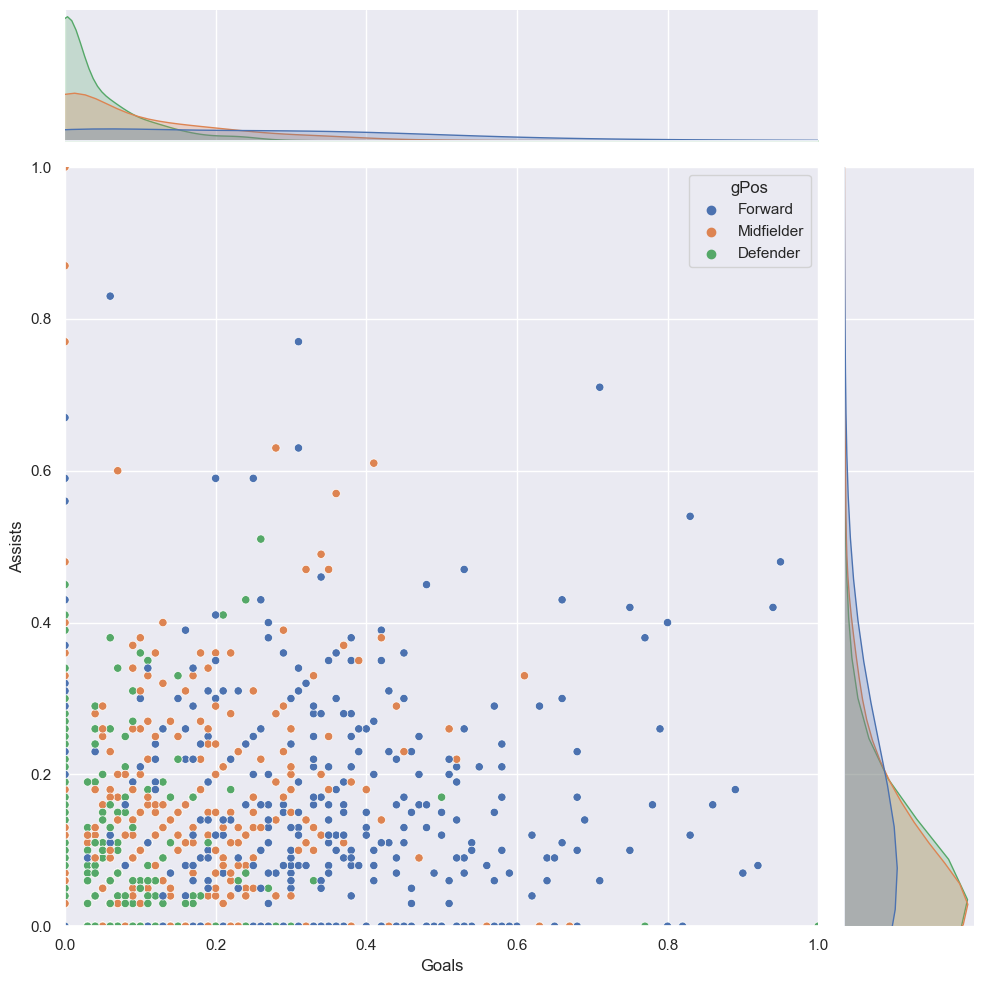

In [54]:
sb.jointplot(data=noGK,
                 x="Goals",
                 y="Assists",
                 xlim = {0,1},
                 ylim = {0,1},
                 height = 10,
                 hue="gPos")

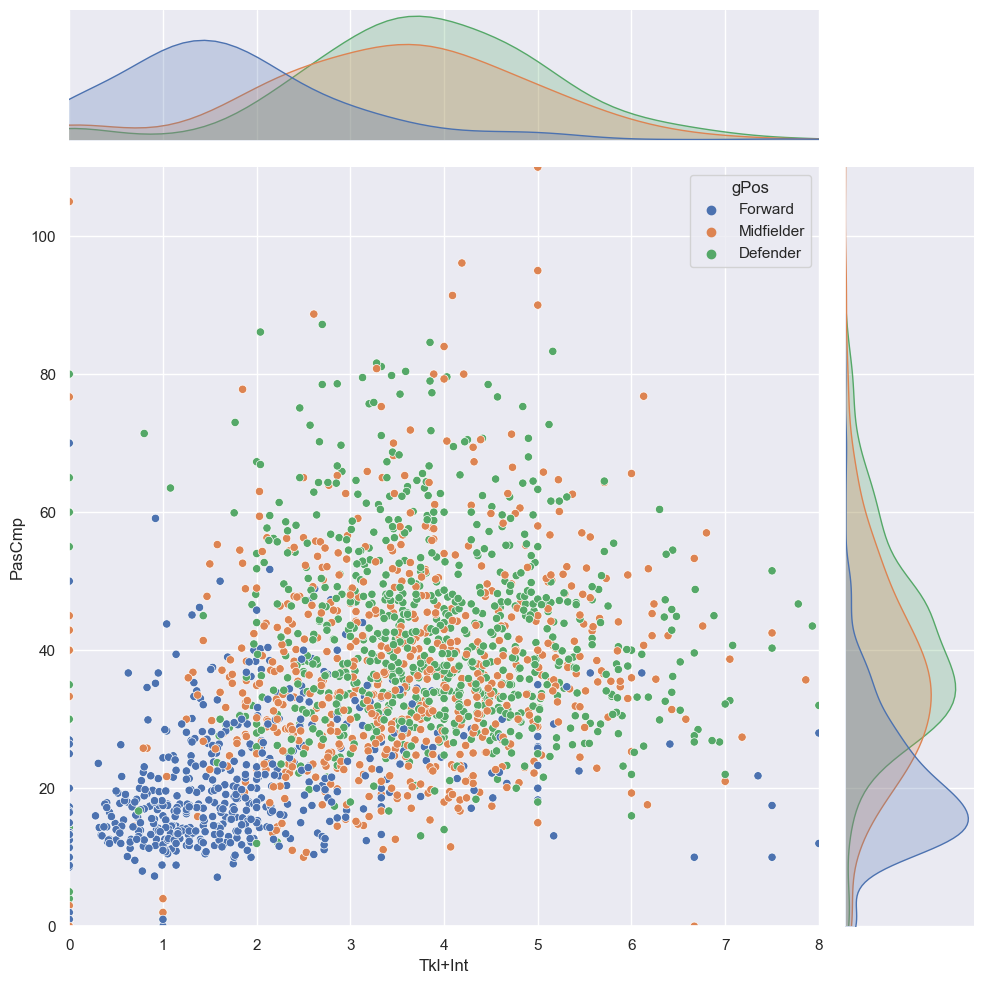

In [59]:
sb.jointplot(data=noGK,
                 x="Tkl+Int",
                 y="PasCmp",
                 xlim = {0,8},
                 ylim = {0,110},
                 height = 10,
                 hue="gPos")

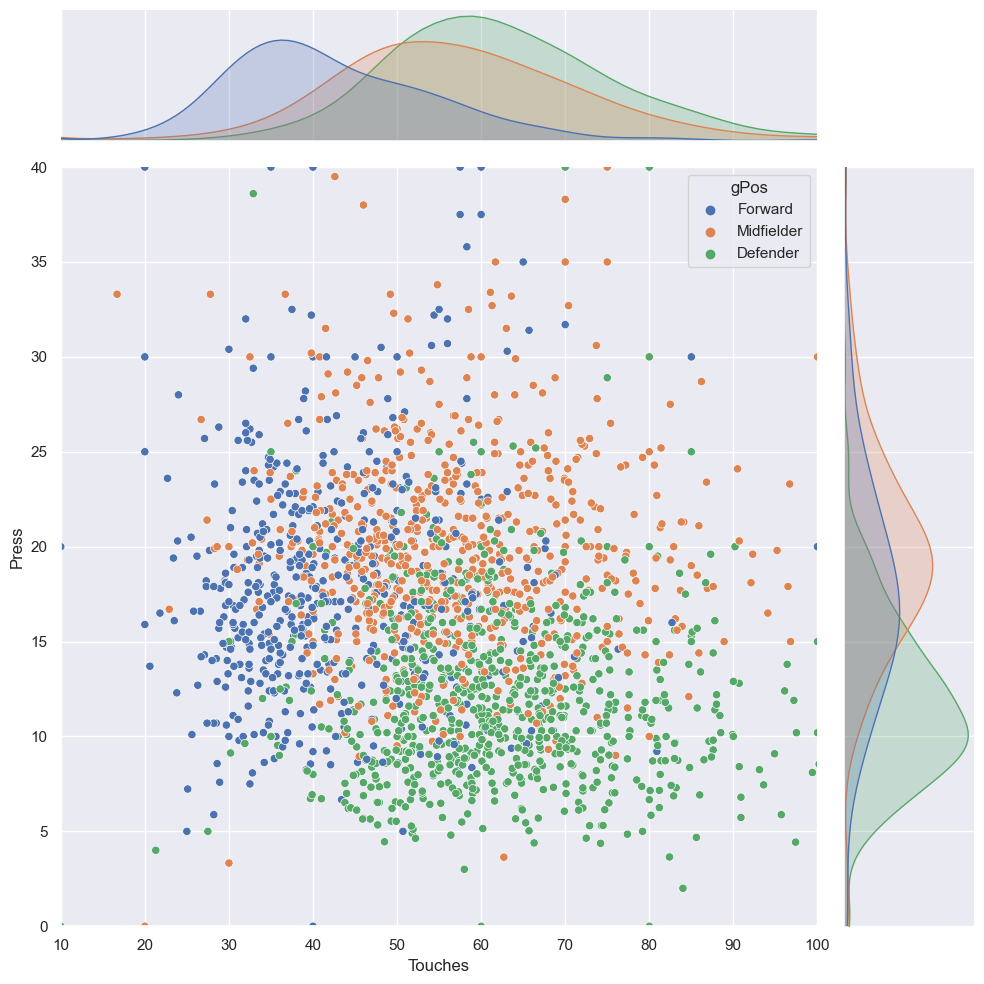

In [73]:
sb.jointplot(data=noGK,
                 x="Touches",
                 y="Press",                 
                 xlim = {10,100},
                 ylim = {0,40},
                 height = 10,
                 hue="gPos")

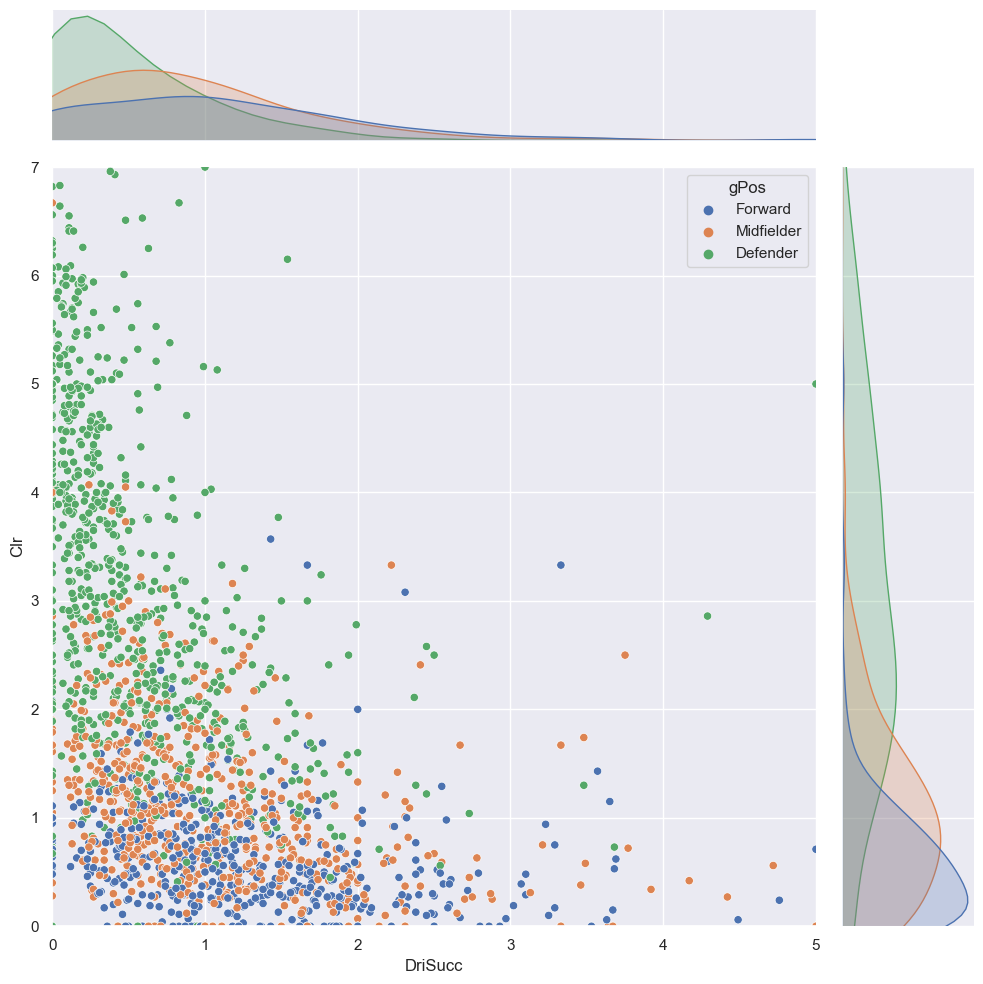

In [75]:
sb.jointplot(data=noGK,
                 x="DriSucc",
                 y="Clr",                 
                 xlim = {0,5},
                 ylim = {0,7},
                 height = 10,
                 hue="gPos")